In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import string
import regex as re
import nltk as nltk
from nltk import corpus
from nltk.stem import PorterStemmer
device_name= tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [44]:
missing_values = ["n/a", "na", "--"]
df_hotel = pd.read_csv('tripadvisor_hotel_reviews.csv', encoding='latin-1')

In [45]:
df_hotel.isna().sum()

Review    0
Rating    0
dtype: int64

In [46]:
df_hotel.head(3000)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
2995,not paid money trip won day/two night trip bav...,1
2996,"save money mexico save money, spent week janua...",1
2997,"good holiday husband princess march break, vip...",4
2998,not speak english just like share interested v...,2


In [47]:
df_hotel.tail(5000)

,Review,Rating
15491,seasons not perfect stayed night service facil...,2
15492,"not faulted, stayed christmas 2005 experience ...",5
15493,"excellent hotel stayed 5 nights dec 26th, got ...",5
15494,rough stay not typical seasons experience hote...,2
15495,not asked better.. title says excellent time n...,5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [48]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split
df_hotel['review_text_split']=df_hotel['Review'].apply(lambda x: tokenize(x.lower()))
df_hotel.head(100)

,Review,Rating,review_text_split
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, 4, experience, hotel, monac..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game..."
...,...,...,...
95,"excellent stay staff friendly helpful, nice ho...",4,"[excellent, stay, staff, friendly, helpful, ni..."
96,return going seattle booked hotel knowing budg...,4,"[return, going, seattle, booked, hotel, knowin..."
97,terrible hotel approximately 2 weeks ago april...,1,"[terrible, hotel, approximately, 2, weeks, ago..."
98,great price okay experience stayed inn queen a...,3,"[great, price, okay, experience, stayed, inn, ..."


In [49]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [50]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
df_hotel['review_text_stopwords'] = df_hotel['review_text_split'].apply(lambda x: remove_stopwords(x))
df_hotel.head(1000)

,Review,Rating,review_text_split,review_text_stopwords
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."
...,...,...,...,...
995,average price hotel good location 1.5 blocks u...,3,"[average, price, hotel, good, location, 1, 5, ...","[average, price, hotel, good, location, 1, 5, ..."
996,good customer service recently wrote dissatisf...,4,"[good, customer, service, recently, wrote, dis...","[good, customer, service, recently, wrote, dis..."
997,ignore bad press just post review reading nega...,4,"[ignore, bad, press, just, post, review, readi...","[ignore, bad, press, post, review, reading, ne..."
998,"business trip ok hotel fine evening business, ...",3,"[business, trip, ok, hotel, fine, evening, bus...","[business, trip, ok, hotel, fine, evening, bus..."


In [51]:
stemmer = nltk.stem.SnowballStemmer(language='english')
def stem_list(row):
    my_list = row['review_text_stopwords']
    stemmed_list = [stemmer.stem(word) for word in my_list]
    return (stemmed_list)

df_hotel['stemmed_review'] = df_hotel.apply(stem_list, axis=1)

In [52]:
df_hotel.head(1000)

,Review,Rating,review_text_split,review_text_stopwords,stemmed_review
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."
...,...,...,...,...,...
995,average price hotel good location 1.5 blocks u...,3,"[average, price, hotel, good, location, 1, 5, ...","[average, price, hotel, good, location, 1, 5, ...","[averag, price, hotel, good, locat, 1, 5, bloc..."
996,good customer service recently wrote dissatisf...,4,"[good, customer, service, recently, wrote, dis...","[good, customer, service, recently, wrote, dis...","[good, custom, servic, recent, wrote, dissatis..."
997,ignore bad press just post review reading nega...,4,"[ignore, bad, press, just, post, review, readi...","[ignore, bad, press, post, review, reading, ne...","[ignor, bad, press, post, review, read, negat,..."
998,"business trip ok hotel fine evening business, ...",3,"[business, trip, ok, hotel, fine, evening, bus...","[business, trip, ok, hotel, fine, evening, bus...","[busi, trip, ok, hotel, fine, even, busi, matt..."


In [53]:
df_hotel.tail(1000)

,Review,Rating,review_text_split,review_text_stopwords,stemmed_review
19491,mixed reviews accurate just returned week stay...,3,"[mixed, reviews, accurate, just, returned, wee...","[mixed, reviews, accurate, returned, week, sta...","[mix, review, accur, return, week, stay, riu, ..."
19492,"true paradise just came dream vacation, excell...",5,"[true, paradise, just, came, dream, vacation, ...","[true, paradise, came, dream, vacation, excell...","[true, paradis, came, dream, vacat, excel, beg..."
19493,"absolutely wonderful happy resort recommend, r...",5,"[absolutely, wonderful, happy, resort, recomme...","[absolutely, wonderful, happy, resort, recomme...","[absolut, wonder, happi, resort, recommend, re..."
19494,4 days paradise food drink sun poker returned ...,4,"[4, days, paradise, food, drink, sun, poker, r...","[4, days, paradise, food, drink, sun, poker, r...","[4, day, paradis, food, drink, sun, poker, ret..."
19495,enjoyed palace home week following wonderful h...,4,"[enjoyed, palace, home, week, following, wonde...","[enjoyed, palace, home, week, following, wonde...","[enjoy, palac, home, week, follow, wonder, hol..."
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, stay, charm, 5..."
20487,great location price view hotel great quick pl...,4,"[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...","[great, locat, price, view, hotel, great, quic..."
20488,"ok just looks nice modern outside, desk staff ...",2,"[ok, just, looks, nice, modern, outside, desk,...","[ok, looks, nice, modern, outside, desk, staff...","[ok, look, nice, modern, outsid, desk, staff, ..."
20489,hotel theft ruined vacation hotel opened sept ...,1,"[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruin, vacat, hotel, open, sept,..."


In [54]:
def rating_group(rate):
    group = rate['Rating']
    if rate['Rating'] > 3:
        grouped_rate = 'Good'
    elif rate['Rating'] == 3:
        grouped_rate = 'Neutral'
    elif rate['Rating'] < 3:
        grouped_rate = 'Bad'
    return (grouped_rate)

df_hotel['new_rating'] = df_hotel.apply(rating_group, axis=1)

In [55]:
df_hotel.head(1000)

,Review,Rating,review_text_split,review_text_stopwords,stemmed_review,new_rating
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...",Good
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...",Bad
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,...",Neutral
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...",Good
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",Good
...,...,...,...,...,...,...
995,average price hotel good location 1.5 blocks u...,3,"[average, price, hotel, good, location, 1, 5, ...","[average, price, hotel, good, location, 1, 5, ...","[averag, price, hotel, good, locat, 1, 5, bloc...",Neutral
996,good customer service recently wrote dissatisf...,4,"[good, customer, service, recently, wrote, dis...","[good, customer, service, recently, wrote, dis...","[good, custom, servic, recent, wrote, dissatis...",Good
997,ignore bad press just post review reading nega...,4,"[ignore, bad, press, just, post, review, readi...","[ignore, bad, press, post, review, reading, ne...","[ignor, bad, press, post, review, read, negat,...",Good
998,"business trip ok hotel fine evening business, ...",3,"[business, trip, ok, hotel, fine, evening, bus...","[business, trip, ok, hotel, fine, evening, bus...","[busi, trip, ok, hotel, fine, even, busi, matt...",Neutral


In [56]:
df_hotel.tail(1000)

,Review,Rating,review_text_split,review_text_stopwords,stemmed_review,new_rating
19491,mixed reviews accurate just returned week stay...,3,"[mixed, reviews, accurate, just, returned, wee...","[mixed, reviews, accurate, returned, week, sta...","[mix, review, accur, return, week, stay, riu, ...",Neutral
19492,"true paradise just came dream vacation, excell...",5,"[true, paradise, just, came, dream, vacation, ...","[true, paradise, came, dream, vacation, excell...","[true, paradis, came, dream, vacat, excel, beg...",Good
19493,"absolutely wonderful happy resort recommend, r...",5,"[absolutely, wonderful, happy, resort, recomme...","[absolutely, wonderful, happy, resort, recomme...","[absolut, wonder, happi, resort, recommend, re...",Good
19494,4 days paradise food drink sun poker returned ...,4,"[4, days, paradise, food, drink, sun, poker, r...","[4, days, paradise, food, drink, sun, poker, r...","[4, day, paradis, food, drink, sun, poker, ret...",Good
19495,enjoyed palace home week following wonderful h...,4,"[enjoyed, palace, home, week, following, wonde...","[enjoyed, palace, home, week, following, wonde...","[enjoy, palac, home, week, follow, wonder, hol...",Good
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, stay, charm, 5...",Good
20487,great location price view hotel great quick pl...,4,"[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...","[great, locat, price, view, hotel, great, quic...",Good
20488,"ok just looks nice modern outside, desk staff ...",2,"[ok, just, looks, nice, modern, outside, desk,...","[ok, looks, nice, modern, outside, desk, staff...","[ok, look, nice, modern, outsid, desk, staff, ...",Bad
20489,hotel theft ruined vacation hotel opened sept ...,1,"[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruin, vacat, hotel, open, sept,...",Bad


In [57]:
rating_category = pd.get_dummies(df_hotel.new_rating)
df_baru = pd.concat([df_hotel, rating_category], axis=1)
df_baru = df_baru.drop(columns='Rating')
df_baru

,Review,review_text_split,review_text_stopwords,stemmed_review,new_rating,Bad,Good,Neutral
0,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...",Good,0,1,0
1,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...",Bad,1,0,0
2,nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,...",Neutral,0,0,1
3,"unique, great stay, wonderful time hotel monac...","[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...",Good,0,1,0
4,"great stay great stay, went seahawk game aweso...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...",Good,0,1,0
...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...","[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, stay, charm, 5...",Good,0,1,0
20487,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...","[great, locat, price, view, hotel, great, quic...",Good,0,1,0
20488,"ok just looks nice modern outside, desk staff ...","[ok, just, looks, nice, modern, outside, desk,...","[ok, looks, nice, modern, outside, desk, staff...","[ok, look, nice, modern, outsid, desk, staff, ...",Bad,1,0,0
20489,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruin, vacat, hotel, open, sept,...",Bad,1,0,0


In [58]:
df_baru.dtypes

Review                   object
review_text_split        object
review_text_stopwords    object
stemmed_review           object
new_rating               object
Bad                       uint8
Good                      uint8
Neutral                   uint8
dtype: object

In [59]:
review = df_baru['stemmed_review'].values
label = df_baru[['Bad','Good','Neutral']].values
label

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [60]:
print(review.shape, label.shape)

(20491,) (20491, 3)


In [61]:
from sklearn.model_selection import train_test_split
review_train, review_test,label_train, label_test = train_test_split(review, label, test_size=0.2, shuffle=False)

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
     
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(review_train)
tokenizer.fit_on_texts(review_test)
     
sequence_train = tokenizer.texts_to_sequences(review_train)
sequence_test = tokenizer.texts_to_sequences(review_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [63]:
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=50000, output_dim=16),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(128),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(3, activation='softmax')
     ])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [64]:
num_epochs = 100
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('val_accuracy') > 0.85 and logs.get('accuracy') > 0.85):
        self.model.stop_training = True

callbacks = callBack()
history = model.fit(padded_train, label_train, batch_size=128, epochs=num_epochs, callbacks=[callbacks], validation_data=(padded_test, label_test), verbose=2)

Epoch 1/100
129/129 - 19s - loss: 0.6986 - accuracy: 0.7388 - val_loss: 0.7527 - val_accuracy: 0.7717
Epoch 2/100
129/129 - 17s - loss: 0.5117 - accuracy: 0.8167 - val_loss: 0.5996 - val_accuracy: 0.8029
Epoch 3/100
129/129 - 17s - loss: 0.4485 - accuracy: 0.8338 - val_loss: 0.4536 - val_accuracy: 0.8404
Epoch 4/100
129/129 - 17s - loss: 0.3912 - accuracy: 0.8510 - val_loss: 0.6288 - val_accuracy: 0.8497
Epoch 5/100
129/129 - 17s - loss: 0.3678 - accuracy: 0.8579 - val_loss: 0.4591 - val_accuracy: 0.8624


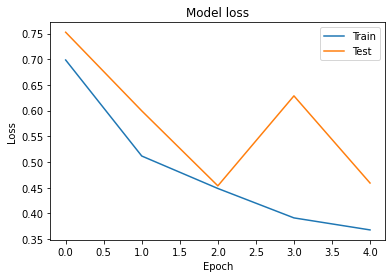

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

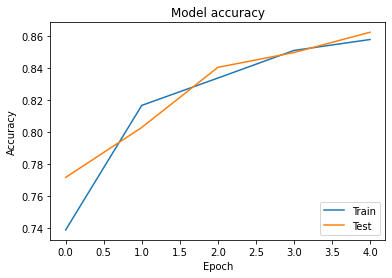

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()